In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/My Drive/DBZ/'

Frieza	Gohan  Goku  Vegeta


In [4]:
dataset_path = '/content/drive/My Drive/DBZ/'

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [6]:
images = []
labels = []

In [7]:
folders = os.listdir(dataset_path)
folders

['Frieza', 'Gohan', 'Vegeta', 'Goku']

In [8]:

name_mapping_dict = {'Frieza': 0,
                     'Gohan': 1,
                     'Vegeta': 2,
                     'Goku': 3}


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'Frieza', 1: 'Gohan', 2: 'Vegeta', 3: 'Goku'}


In [9]:
img_size = 192

In [10]:
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    if (img.shape[2]==3):    
      images.append(img)
      labels.append(name_mapping_dict[folder])

Processing folder: Frieza
Processing folder: Gohan
Processing folder: Vegeta
Processing folder: Goku


In [11]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [12]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (4084, 192, 192, 3)
labels shape :  (4084,)


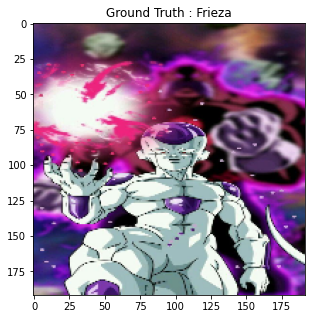

In [13]:
img_number = 200
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

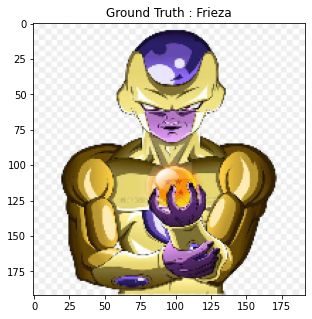

In [14]:
img_number = 400
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

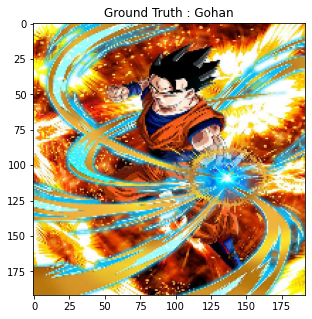

In [15]:
img_number = 1222
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [16]:
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


In [17]:
images = np.array(images) / 255

In [18]:
labels_one_hot = to_categorical(labels)

In [19]:
labels[303]

0

In [20]:
labels_one_hot[303]

array([1., 0., 0., 0.], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (3675, 192, 192, 3) (3675, 4)
Testing data shape :  (409, 192, 192, 3) (409, 4)


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=15, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/15
115/115 [==============================] - 182s 2s/step - loss: 1.3562 - accuracy: 0.3905 - val_loss: 1.1578 - val_accuracy: 0.5086
Epoch 2/15
115/115 [==============================] - 181s 2s/step - loss: 1.0794 - accuracy: 0.5478 - val_loss: 1.0332 - val_accuracy: 0.5941
Epoch 3/15
115/115 [==============================] - 178s 2s/step - loss: 0.8542 - accuracy: 0.6528 - val_loss: 1.0984 - val_accuracy: 0.5550
Epoch 4/15
115/115 [==============================] - 177s 2s/step - loss: 0.6123 - accuracy: 0.7722 - val_loss: 1.0934 - val_accuracy: 0.5868
Epoch 5/15
115/115 [==============================] - 178s 2s/step - loss: 0.3842 - accuracy: 0.8659 - val_loss: 1.1773 - val_accuracy: 0.6308
Epoch 6/15
115/115 [==============================] - 178s 2s/step - loss: 0.2586 - accuracy: 0.9211 - val_loss: 1.4385 - val_accuracy: 0.5770
Epoch 7/15
115/115 [==============================] - 181s 2s/step - loss: 0.1810 - accuracy: 0.9502 - val_loss: 1.4323 - val_accuracy: 0.6479

In [25]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

13/13 [==============================] - 9s 689ms/step - loss: 1.6058 - accuracy: 0.6333
Evaluation result on Test Data : Loss = 1.6057544946670532, accuracy = 63.32518458366394


In [26]:
model_path = '/content/drive/My Drive/My Drive/DBZ/'

model.save(model_path+'BSEF19M043_Model.h5')

Model prediction: Vegeta


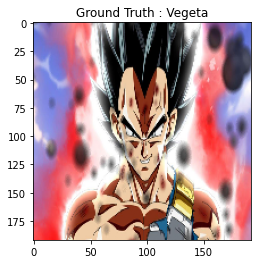

In [27]:
test_img_number = 7

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Frieza


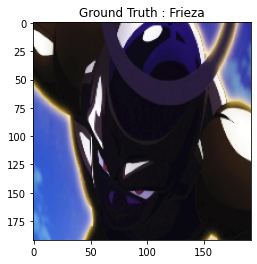

In [28]:
test_img_number = 50

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Vegeta


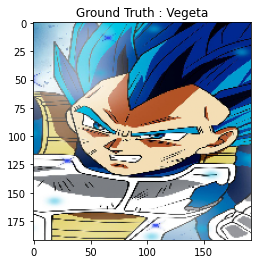

In [31]:
test_img_number = 4

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Goku


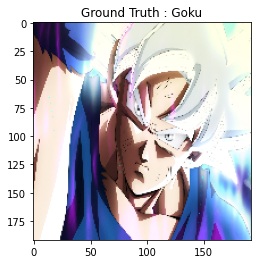

In [33]:
test_img_number = 8

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

In [37]:
img = plt.imread('vegeta.jpg')
img = cv2.resize(img, (img_size, img_size))


img.shape

(192, 192, 3)

In [38]:
temp_img = np.expand_dims(img, axis=0)

temp_img.shape

(1, 192, 192, 3)

Model prediction: Vegeta


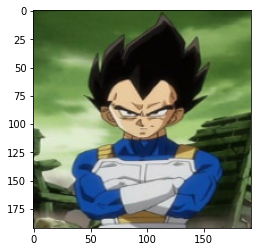

In [39]:
prediction = inv_name_mapping_dict[np.argmax(model.predict(temp_img)[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(img)
plt.show()

Model prediction: Frieza


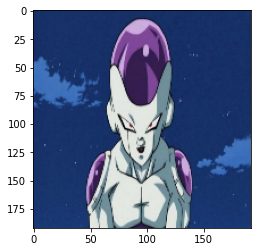

In [40]:
img = plt.imread('frieza.jpg')
img = cv2.resize(img, (img_size, img_size))


img.shape
temp_img = np.expand_dims(img, axis=0)

temp_img.shape
prediction = inv_name_mapping_dict[np.argmax(model.predict(temp_img)[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(img)
plt.show()

2 Right predictions of images from internet
